In [25]:
import cv2
import matplotlib.pyplot as plt

Load image:

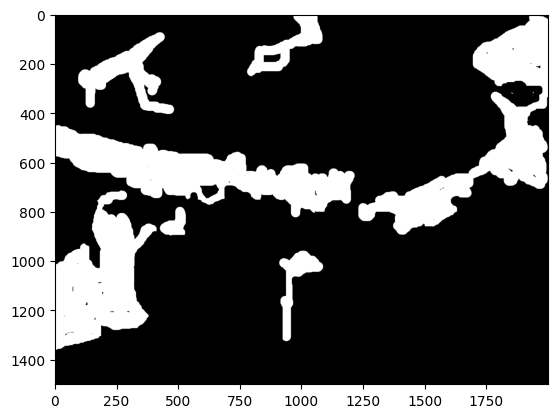

In [3]:
img = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap="gray")

In [4]:
img.shape

(1500, 2000)

Get contours and filter them (delete small ones)

In [5]:
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
new_contours = []
for cnt in contours:
    if cv2.contourArea(cnt) > 0.005*img.shape[0]*img.shape[1]:
        new_contours.append(cnt)

In [6]:
len(contours), len(new_contours)

(48, 6)

Downgrade the ammount of points in contours

In [7]:
approx = []
for cnt in new_contours:
    epsilon = 0.005*cv2.arcLength(cnt,True)
    approx.append(cv2.approxPolyDP(cnt,epsilon,True))

Visualize

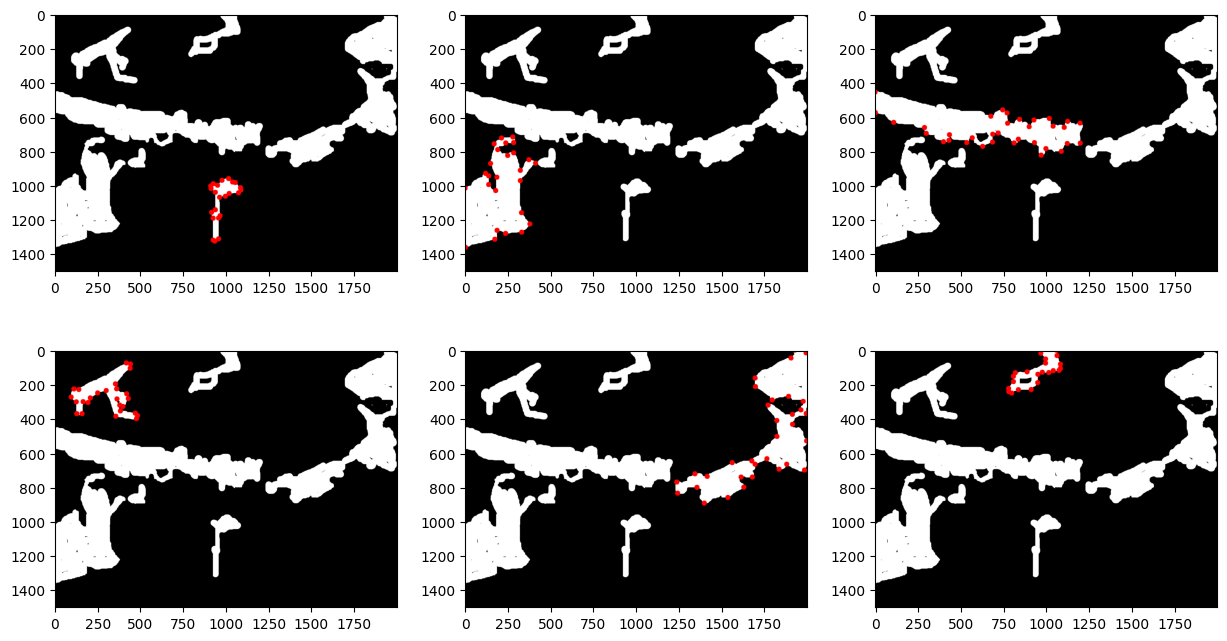

In [8]:
plt.rcParams["figure.figsize"] = (15, 8)
fig, ax = plt.subplots(2,3)
for i, app in enumerate(approx):
    image = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    for point in app:
        p = point.reshape(-1)
        image = cv2.circle(image, (p[0],p[1]), radius=15, color=(255, 0, 0), thickness=-1)
    ax[i//3,i%3].imshow(image)